<a href="https://colab.research.google.com/github/richapatel93/Deep-learning/blob/main/MNIST-CNN-Activation-Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Activation Functions from Scratch

In [1]:
import numpy as np

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Tanh
def tanh(x):
    return np.tanh(x)

# ReLU
def relu(x):
    return np.maximum(0, x)

# Leaky ReLU
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Swish
def swish(x):
    return x * sigmoid(x)

# Mish
def mish(x):
    return x * tanh(np.log(1 + np.exp(x)))

# Softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # For numerical stability
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

# Plot Activation Functions and Their Derivatives

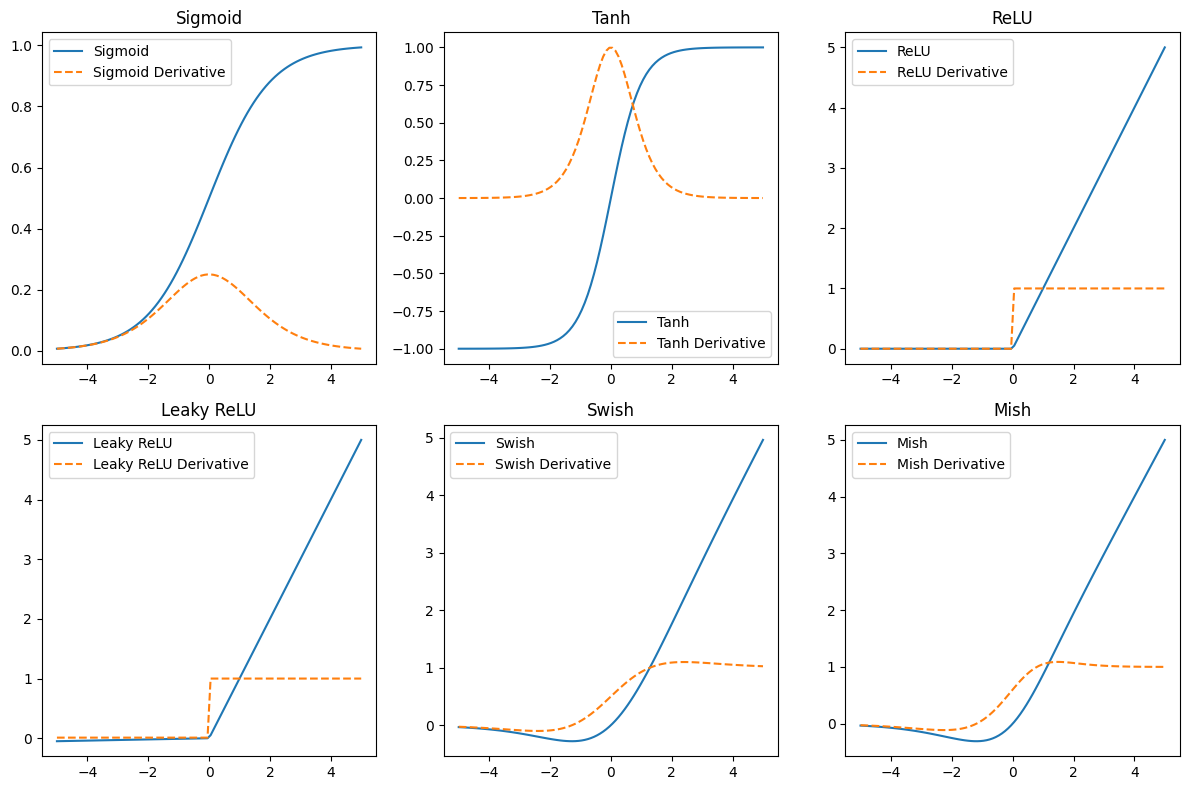

In [2]:
import matplotlib.pyplot as plt

# Derivatives
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh_derivative(x):
    return 1 - tanh(x) ** 2

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def swish_derivative(x):
    return swish(x) + sigmoid(x) * (1 - swish(x))

def mish_derivative(x):
    omega = np.exp(3 * x) + 4 * np.exp(2 * x) + (6 + 4 * x) * np.exp(x) + 4 * (1 + x)
    delta = 1 + np.power((np.exp(x) + 1), 2)
    return np.exp(x) * omega / np.power(delta, 2)

# Plotting
x = np.linspace(-5, 5, 100)
activations = {
    "Sigmoid": sigmoid(x),
    "Tanh": tanh(x),
    "ReLU": relu(x),
    "Leaky ReLU": leaky_relu(x),
    "Swish": swish(x),
    "Mish": mish(x),
}

derivatives = {
    "Sigmoid": sigmoid_derivative(x),
    "Tanh": tanh_derivative(x),
    "ReLU": relu_derivative(x),
    "Leaky ReLU": leaky_relu_derivative(x),
    "Swish": swish_derivative(x),
    "Mish": mish_derivative(x),
}

plt.figure(figsize=(12, 8))
for i, (name, activation) in enumerate(activations.items()):
    plt.subplot(2, 3, i + 1)
    plt.plot(x, activation, label=f"{name}")
    plt.plot(x, derivatives[name], label=f"{name} Derivative", linestyle="--")
    plt.title(name)
    plt.legend()
plt.tight_layout()
plt.show()

# Demonstrate the Vanishing Gradient Problem.

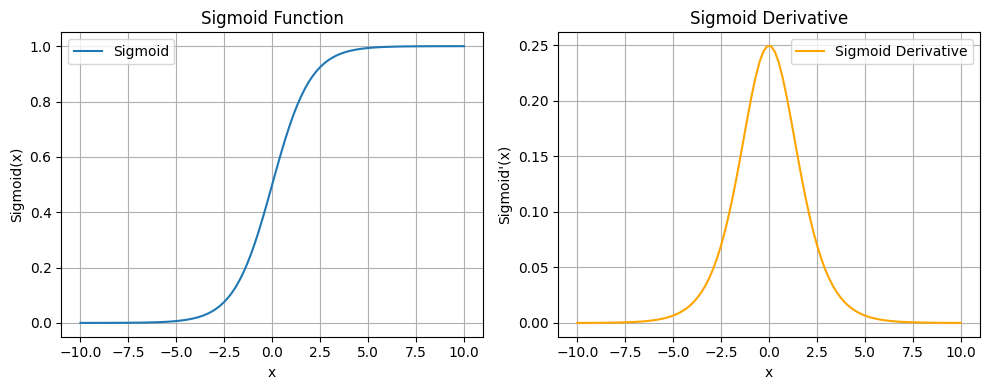

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Input values (from -10 to 10)
x = np.linspace(-10, 10, 100)

# Plot Sigmoid and its derivative
plt.figure(figsize=(10, 4))

# Sigmoid
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid()
plt.legend()

# Sigmoid Derivative
plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_derivative(x), label="Sigmoid Derivative", color="orange")
plt.title("Sigmoid Derivative")
plt.xlabel("x")
plt.ylabel("Sigmoid'(x)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

 Simulate the Vanishing Gradient Problem

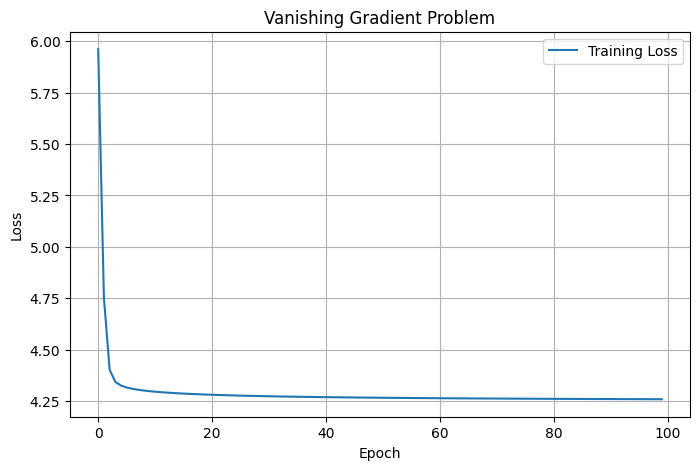

In [4]:
# Simulate Vanishing Gradient Problem
np.random.seed(42)

# Input data (100 samples, 10 features)
X = np.random.randn(100, 10)

# True weights (10 features, 1 output)
true_weights = np.random.randn(10, 1)

# True labels (with some noise)
y = X @ true_weights + 0.1 * np.random.randn(100, 1)

# Initialize random weights
weights = np.random.randn(10, 1)

# Learning rate
learning_rate = 0.1

# Training loop
losses = []
for epoch in range(100):
    # Forward pass
    z = X @ weights
    y_pred = sigmoid(z)

    # Compute loss (Mean Squared Error)
    loss = np.mean((y_pred - y) ** 2)
    losses.append(loss)

    # Backpropagation
    error = y_pred - y
    derivative = sigmoid_derivative(z)
    gradient = X.T @ (error * derivative)

    # Update weights
    weights -= learning_rate * gradient

# Plot loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(losses, label="Training Loss")
plt.title("Vanishing Gradient Problem")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

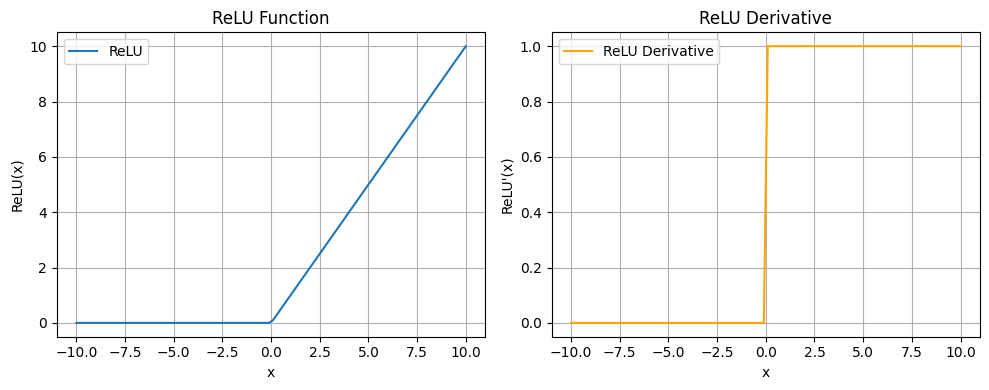

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Input values (from -10 to 10)
x = np.linspace(-10, 10, 100)

# Plot ReLU and its derivative
plt.figure(figsize=(10, 4))

# ReLU
plt.subplot(1, 2, 1)
plt.plot(x, relu(x), label="ReLU")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid()
plt.legend()

# ReLU Derivative
plt.subplot(1, 2, 2)
plt.plot(x, relu_derivative(x), label="ReLU Derivative", color="orange")
plt.title("ReLU Derivative")
plt.xlabel("x")
plt.ylabel("ReLU'(x)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Simulate the Dying ReLU Problem

In [6]:
# Simulate Dying ReLU Problem
np.random.seed(42)

# Input data (1000 samples, 100 features)
X = np.random.randn(1000, 100)

# Random weights (100 features, 50 neurons)
weights = np.random.randn(100, 50) * 0.01  # Small weights to increase chances of dying ReLU

# Bias (50 neurons)
bias = np.zeros(50)

# Forward pass
z = X @ weights + bias
activations = relu(z)

# Count dead neurons
dead_neurons = np.sum(activations == 0) / activations.size
print(f"Percentage of dead ReLU neurons: {dead_neurons * 100:.2f}%")

Percentage of dead ReLU neurons: 50.15%


# Building and Training a Convolutional Neural Network for MNIST Digit Recognition

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.8872 - loss: 0.3987 - val_accuracy: 0.9839 - val_loss: 0.0575
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.9830 - loss: 0.0565 - val_accuracy: 0.9843 - val_loss: 0.0562
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9888 - loss: 0.0364 - val_accuracy: 0.9877 - val_loss: 0.0416
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9920 - loss: 0.0265 - val_accuracy: 0.9852 - val_loss: 0.0507
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.9937 - loss: 0.0202 - val_accuracy: 0.9903 - val_loss: 0.0383
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.9893 - val_loss: 0.0410
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.9966 - loss: 0.0114 - val_accuracy: 0.9876 - val_loss: 0.0474
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.9962 - loss: 0.0115 - 

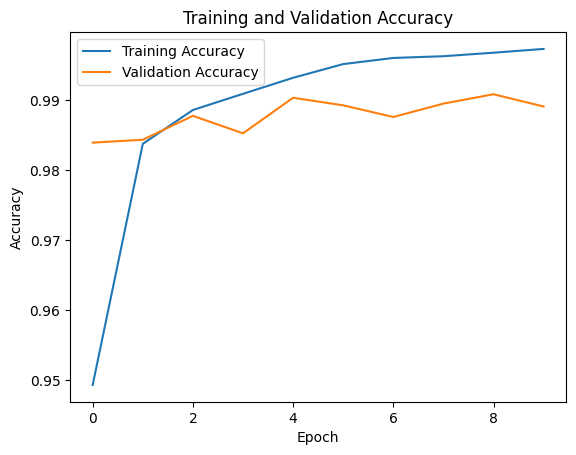

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the Data
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to add a channel dimension (required for CNNs)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 2: Build the CNN Model
model = models.Sequential([
    # First Conv Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Conv Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer
])

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Test Different Activation Functions

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.8795 - loss: 0.3947 - val_accuracy: 0.9802 - val_loss: 0.0674
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.9828 - loss: 0.0580 - val_accuracy: 0.9850 - val_loss: 0.0507
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9889 - loss: 0.0368 - val_accuracy: 0.9818 - val_loss: 0.0639
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9868 - val_loss: 0.0422
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9943 - loss: 0.0184 - val_accuracy: 0.9877 - val_loss: 0.0435
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9951 - loss: 0.0148 - val_accuracy: 0.9877 - val_loss: 0.0482
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9886 - val_loss: 0.0462
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9967 - loss: 0.0099 - 

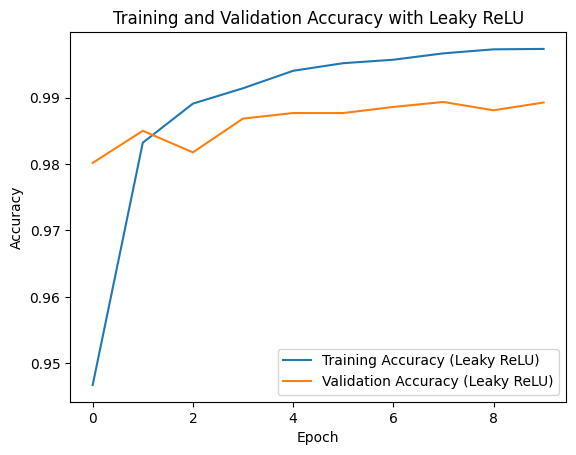

In [8]:
# Step 2: Build the CNN Model with Leaky ReLU
model_leaky = models.Sequential([
    # First Conv Block
    layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    layers.LeakyReLU(alpha=0.1),  # Leaky ReLU
    layers.MaxPooling2D((2, 2)),

    # Second Conv Block
    layers.Conv2D(64, (3, 3)),
    layers.LeakyReLU(alpha=0.1),  # Leaky ReLU
    layers.MaxPooling2D((2, 2)),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(128),
    layers.LeakyReLU(alpha=0.1),  # Leaky ReLU
    layers.Dense(10, activation='softmax')  # Output layer
])

# Step 3: Compile the Model
model_leaky.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Step 4: Train the Model
history_leaky = model_leaky.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Step 5: Evaluate the Model
test_loss_leaky, test_acc_leaky = model_leaky.evaluate(X_test, y_test)
print(f"Test Accuracy with Leaky ReLU: {test_acc_leaky * 100:.2f}%")

# Plot Training and Validation Accuracy
plt.plot(history_leaky.history['accuracy'], label='Training Accuracy (Leaky ReLU)')
plt.plot(history_leaky.history['val_accuracy'], label='Validation Accuracy (Leaky ReLU)')
plt.title('Training and Validation Accuracy with Leaky ReLU')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualize Learned Filters and Feature Maps

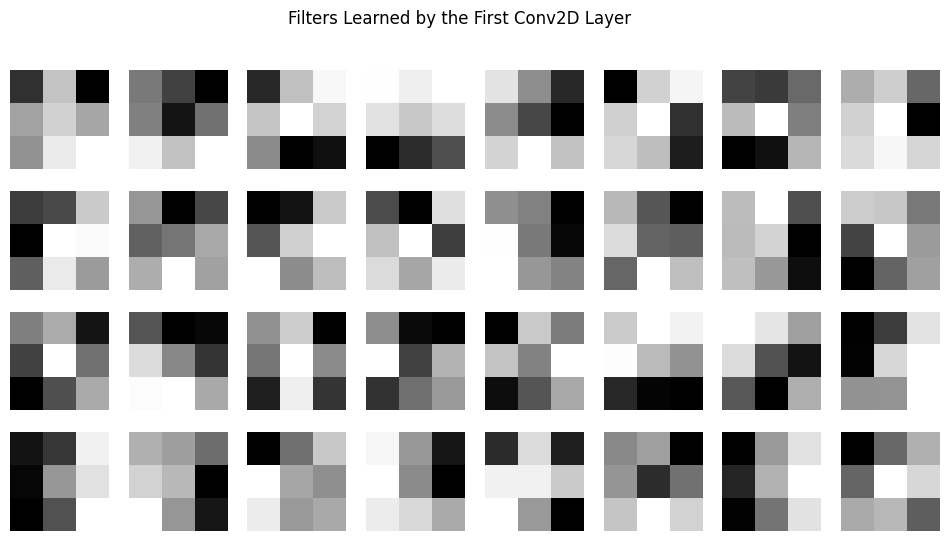

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


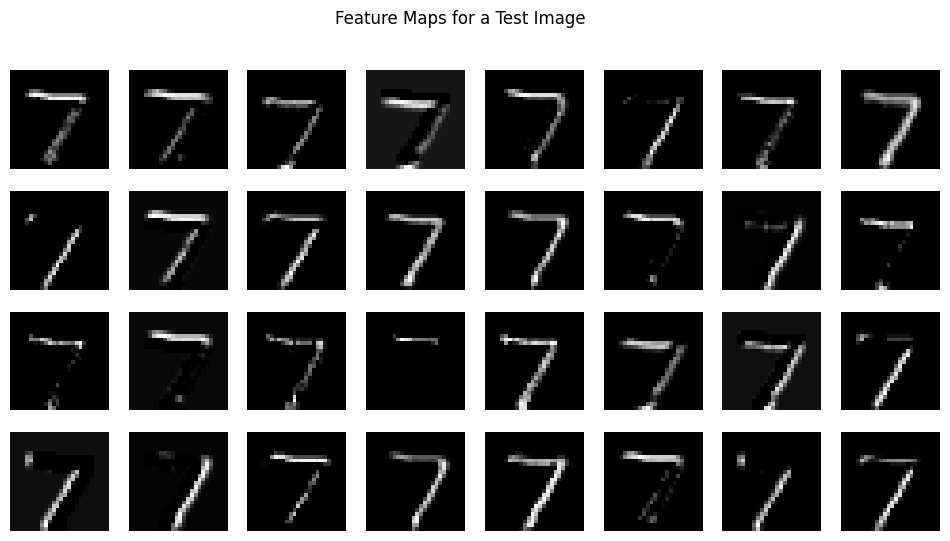

In [9]:
# Visualize Filters
filters, biases = model.layers[0].get_weights()
filters = filters[:, :, 0, :]  # Get the first channel of the filters

plt.figure(figsize=(12, 6))
for i in range(32):  # First 32 filters
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters[:, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Filters Learned by the First Conv2D Layer')
plt.show()

# Visualize Feature Maps for a Test Image
from tensorflow.keras.models import Model

# Create a model to output feature maps
feature_map_model = Model(inputs=model.inputs, outputs=model.layers[0].output)

# Choose a test image
test_image = X_test[0].reshape(1, 28, 28, 1)

# Get feature maps
feature_maps = feature_map_model.predict(test_image)

# Plot feature maps
plt.figure(figsize=(12, 6))
for i in range(32):  # First 32 feature maps
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Feature Maps for a Test Image')
plt.show()